<a href="https://colab.research.google.com/github/angelarwa/TIL/blob/master/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 12월 20일

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320 

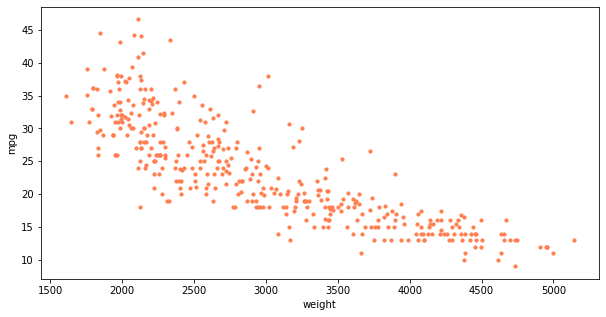

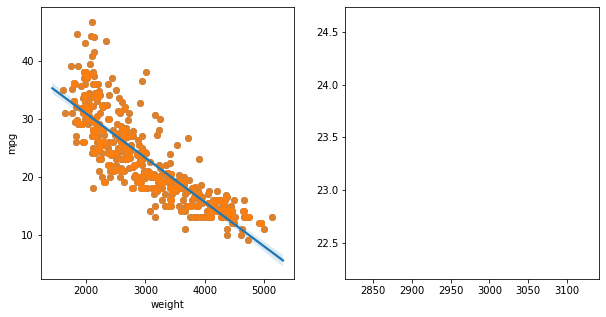

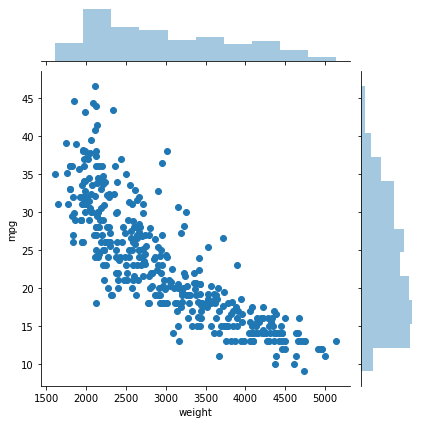

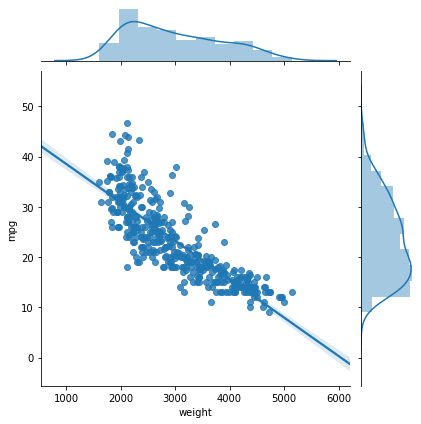

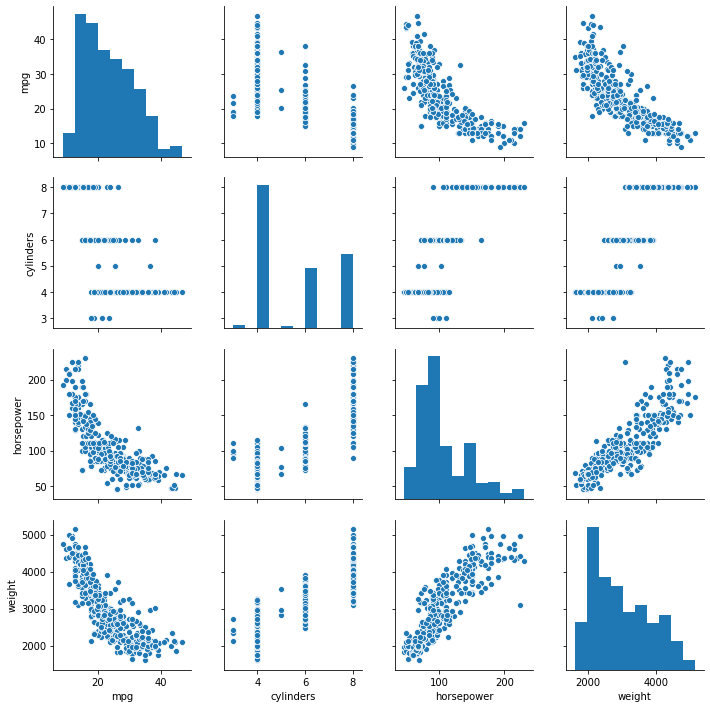

train data  개수 : 274


NameError: name 'X_test' is not defined

In [0]:
##############선형 회귀분석 실습 ##########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_csv("C:/Users/student/Desktop/datas/datas/auto-mpg.csv", header=None)
print(df.info())

#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
print(df.head())

pd.set_option('display.max_columns', 10)
print(df.head())

#2단계: 데이터 탐색
print(df.info()) 
print(df.describe())
print(df['horsepower'].unique())  

# horsepower열에서 ?를 NaN값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True) 
#horsepower열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')
print(df.describe())



    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


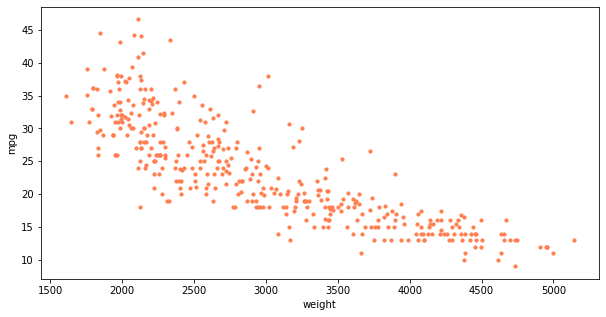

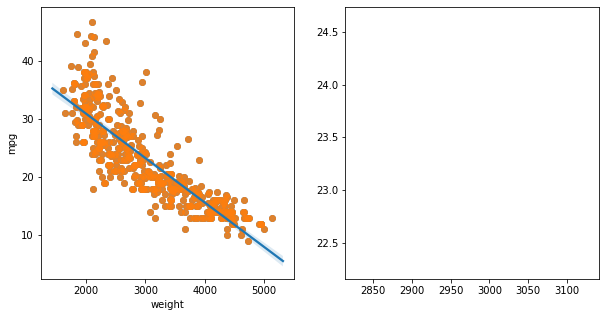

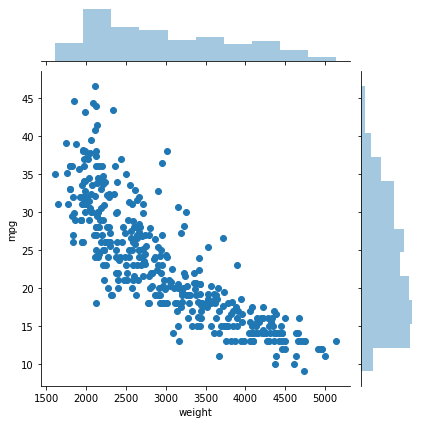

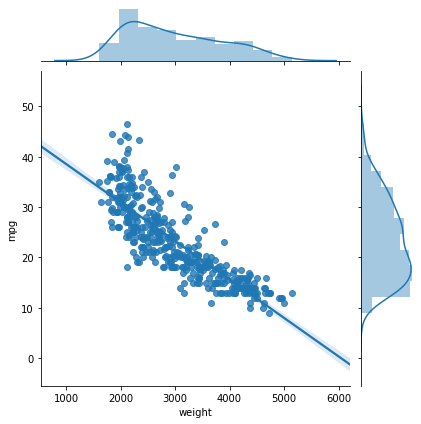

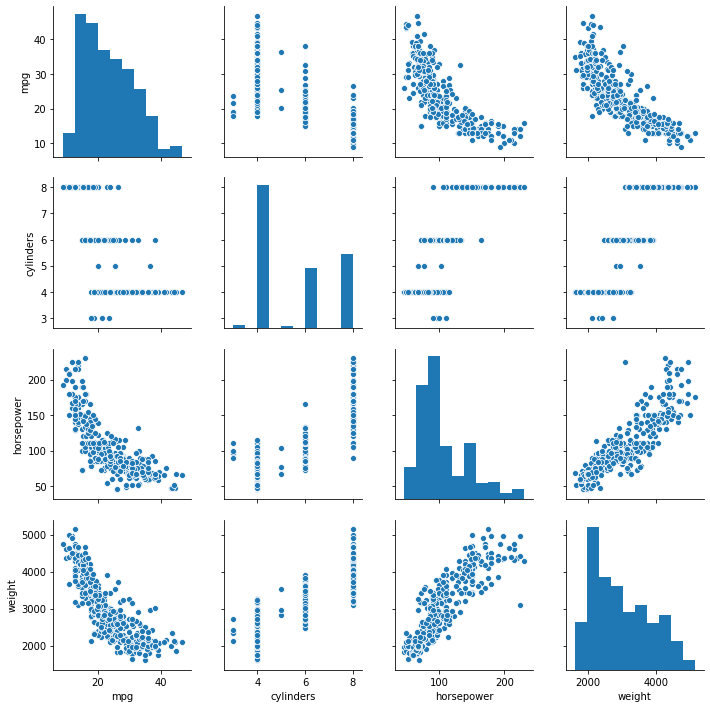

In [0]:
#3단계: 분석에 사용할 특성(열,변수)선택 (연비,실린더,마력,중력)
ndf = df[['mpg','cylinders','horsepower','weight']]
print(ndf.head())

#종속변수(mpg)와 다른 변수('cylinders','horsepower','weight')간의 선형관계 여부 확인
#matplotlib로 산점도 그리기
ndf.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.show()
plt.close()

#seaborn으로 산점도 그리기
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1) #회귀선을 기본적으로 표시해줌
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1, fit_reg=False)
plt.show()
plt.close()

sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg')  #회귀선 표시
plt.show()
plt.close()

sns.pairplot(ndf)
plt.show()
plt.close()

train data  개수 : 274
test data  개수 : 118
0.6822458558299325
기울기 a :  [-0.00775343]
절편 b :  46.710366257280086


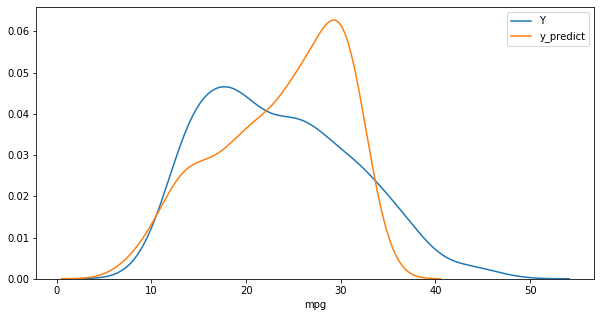

In [0]:
# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

print('train data  개수 :', len(X_train))
print('test data  개수 :', len(X_test))

# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 : 0.6822458558299325 ->약 68%

print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :  [-0.00775343]
# 절편 b :  46.710366257280086

y_predict =lr.predict(X)   #독립변수에 대한 예측된 종속변수값 

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label='Y')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
(274, 3)
(274, 1)
0.7087009262975685
기울기 a :  [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
절편 b :  62.58071221573144


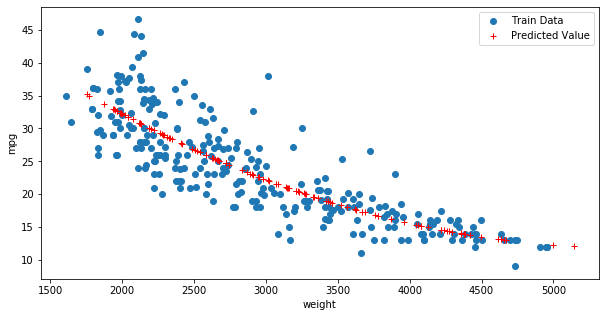

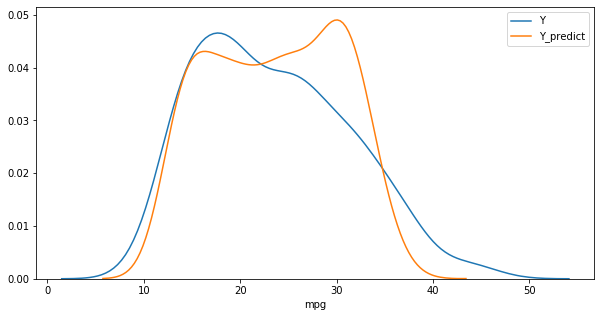

In [0]:
##############다항  회귀분석 실습 ##########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_csv("C:/Users/student/Desktop/datas/datas/auto-mpg.csv", header=None) #dataframe(df)
print(df.info()) 

#컬럼(열) 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace=True) # horsepower열에서 ?를 NaN값으로 대체
df.dropna(subset=['horsepower'], axis=0, inplace=True)#horsepower열이 NaN인 행을 삭제
df['horsepower'] = df['horsepower'].astype('float') #문자열 데이터를 실수형 데이터로 변환

#3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight' ]]


# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

from sklearn.model_selection import train_test_split
X_train, X_tset, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10) 
# train data 와 test data를 7:3 비율로 분리,랜덤 추출값 10

# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 
from  sklearn.preprocessing import PolynomialFeatures  #다항식 변환

#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape)
print(X_train.shape)

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(x_train_poly, Y_train)  #학습


x_test_poly =poly.fit_transform(X_test) 
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :  0.7087009262975685 ->약 70%

print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)


#기울기 a :[ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
# 절편 b :  62.58071221573144

y_test_predict = lr.predict(x_test_poly)  #test 데이터에 대한 모델의 예측값 구하기

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)
ax.plot(X_train, Y_train, 'o', label='Train Data')
ax.plot(X_test, y_test_predict, 'r+', label='Predicted Value')  #학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()


#전체 데이터 X 를 2차항으로 변형
X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)   #전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label="Y")
ax2 = sns.distplot(y_predict, hist=False, label="Y_predict", ax=ax1)
plt.show()
plt.close()

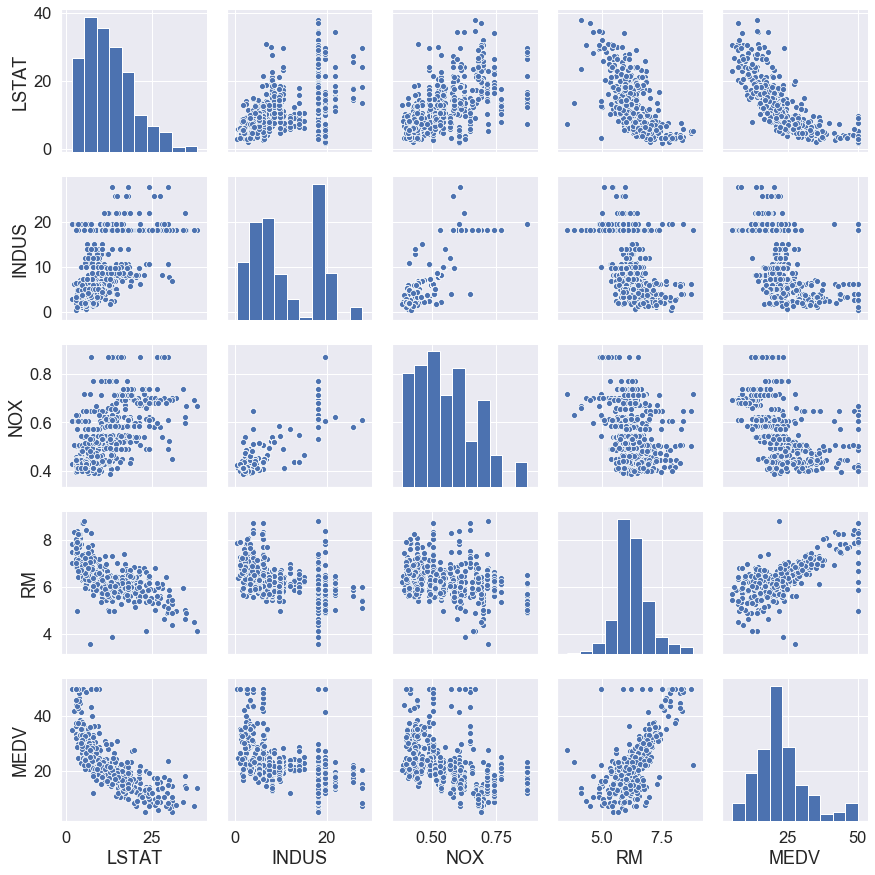

In [0]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',
              header=None,
              sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS',
            'NOX','RM','AGE','DIS','RAD',
            'TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

import matplotlib.pyplot as plt
import seaborn as sns
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],height=2.5) #pairplot=산점도 행렬 그리기
plt.tight_layout()
plt.show()

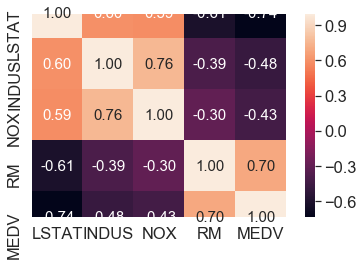

In [0]:
import numpy as np
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm, #상관관계 행렬을 heatmap으로 나타냄/선형 상관관계를 바탕으로 특성을 선택하는데 유용한 정보를 요약
              cbar=True,
              annot=True,
              square=True,
              fmt='.2f',
              annot_kws={'size':15},
              yticklabels=cols,
              xticklabels=cols)
plt.tight_layout()
#MEDV와 LSTAT 상관관계 높음(-0.74) but 비선형
#RM과 MEDV(-0.7) &선형


In [0]:
#경사하강법(GD)로 회귀 모델의 파라미터 구하기
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            output = self.net_input(x)
            errors = (y - output)
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
        
    def predict(self, x):
        return self.net_input(x)

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

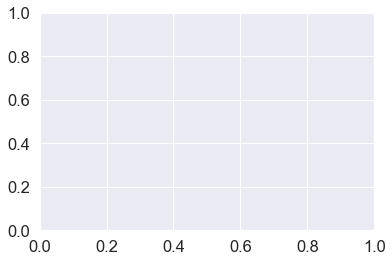

In [0]:
#주택 데이터셋에서 RM(방 개수) 변수를 특성으로 하여 MEDV(주택 가격)를 예측하는 모델을 훈련
x=df[['RM']].values
y=df['MEDV'].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x_std=sc_x.fit_transform(x)
y_std=sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(x_std, y_std)


plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()


def lin_regplot(x, y, model):
    plt.scatter(x, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(x, model.predict(x), color='black', lw=2)
    return None

lin_regplot(x_std, y_std, Ir)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()


num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f"%\
     sc_y.inverse_transform(price_std))

print('기울기: %.3f' %lr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
0.6939048496695597
기울기 a :  [-0.60691288 -0.03714088 -0.00522268]
절편 b :  46.41435126963405


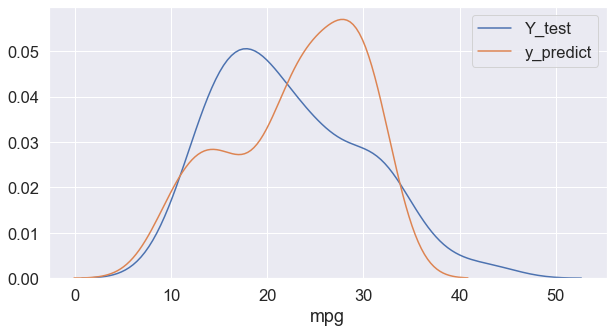

In [0]:
######################다중  회귀분석 실습 ##########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_csv("C:/Users/student/Desktop/datas/datas/auto-mpg.csv", header=None)
print(df.info()) 

#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# horsepower열에서 ?를 NaN값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True) 
#horsepower열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')

#3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight' ]]


# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['cylinders', 'horsepower', 'weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비


# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

#5단계 : 다중 회귀분석  
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습 => 모델 생성

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :  

print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

y_predict =lr.predict(X_test)   #독립변수에 대한 예측된 종속변수값 

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_test, hist=False, label='Y_test')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()

In [0]:
#귀납(영)가설: ~차이가없다.영향이없다
#vs 연구(대립)가설: 차이가 있다. 영향이있다
#유의수준이 0.05 미만이면 영향을 주지 않고, 0.05이상이면 영향을 준다.

In [0]:
##############로지스틱 회귀분석 실습 ##########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

score=[56,60,61,67,69, 55,70,44,51,64, 60,50,68,72,90, 93,85,74,81,88, 92,97,77,78,98]
grade=[3.61, 2.93, 3.14, 4.00, 3.23,  3.89, 3.66, 3.51, 2.53, 3.61, 
       2.93, 3.14, 4.00, 3.23, 2.53, 3.23, 3.89, 3.66, 3.51, 3.89,  3.66, 3.51, 2.53 ,3.14, 4.00]
_pass = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

df = pd.DataFrame( {"score":score, "grade": grade, "_pass":_pass})
print(df.info())

X=df[['score', 'grade']]
Y=df[['_pass']]

# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)   


from sklearn.linear_model import LogisticRegression 
logR = LogisticRegression() 
logR.fit(X_train, Y_train)   #학습

print('정확도: ', logR.score(X_train, Y_train))
print('정확도: ', logR.score(X_test, Y_test))


from sklearn.metrics import classification_report
y_predict = logR.predict(X_test)
print(classification_report(Y_test, y_predict )) #실제 합격/불합격 테스트 데이터,모형으로부터 예측된 합격/불합격 테스트 데이터 



#방법2 :
import statsmodels.api as sm
logit = sm.Logit(df['_pass'], X)  #로지스틱 회귀분석 실행
result = logit.fit()
print(result.summary2())
print(result.params) #종속변수에 영향을 미치는 정도 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
score    25 non-null int64
grade    25 non-null float64
_pass    25 non-null int64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes
None
정확도:  0.8823529411764706
정확도:  0.75
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.67      0.80         6

    accuracy                           0.75         8
   macro avg       0.75      0.83      0.73         8
weighted avg       0.88      0.75      0.77         8

Optimization terminated successfully.
         Current function value: 0.431881
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.370     
Dependent Variable: _pass            AIC:              25.5940   
Date:               2019-12-20 16:25 BIC:              28.0318   
No. Observations:   25               Log-Likelihood:

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#로지스틱 회귀 분석을 수행하시오

#weather.csv파일을 읽어서, Temp, Sunshine,  Humidity, Pressure, Cloud, RainToday , RainTomorrow 특성을 읽어서, dataframe으로 생성하고,
#RainTomorrow 변수(특성)을  로짓변환 (출력범위를 [0,1]로 조정) 합니다.

#데이터를 train data 와 test data를 7:3 비율로 분리하여 로지스틱 회귀분석을 수행하고, 모델의 정확도를 출력하고
#Temp, Sunshine,  Umidity, Pressure, Cloud가 내일 비가 올것이라고 예보하는 영향도를 평가하시오


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_csv("C:/Users/student/Desktop/datas/datas/weather.csv", header=None)
print(df.info()) 

#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['Date','MinTemp','MaxTemp','Rainfall','Sunshine','WindGustDir','WindGustSpeed','windDir','WindSpeed','Humidity','Pressure',
            'Cloud','Temp','RainToday','RainTomorrow']

#문자열 데이터를 실수형 데이터로 변환
#df['RainTomorrow'] = df['RainTomorrow'].astype('float')
#print(df.describe())

    
#RainTomorrow 변수(특성)을  로짓변환 (출력범위를 [0,1]로 조정) 합니다.???


ndf = df[['Temp', 'Sunshine',  'Humidity', 'Pressure', 'Cloud', 'RainToday' , 'RainTomorrow']]

X=ndf[['Temp', 'Sunshine',  'Humidity', 'Pressure', 'Cloud', 'RainToday' ]]
Y=ndf[['RainTomorrow']]


# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)   

from sklearn.linear_model import LogisticRegression 
logR = LogisticRegression() 
logR.fit(X_train, Y_train)   #학습

print('정확도: ', logR.score(X_train, Y_train))
print('정확도: ', logR.score(X_test, Y_test))


from sklearn.metrics import classification_report
y_predict = logR.predict(X_test)
print(classification_report(Y_test, y_predict )) #실제 합격/불합격 테스트 데이터,모형으로부터 예측된 합격/불합격 테스트 데이터 


#방법2 :
import statsmodels.api as sm
logit = sm.Logit(df['_pass'], X)  #로지스틱 회귀분석 실행
result = logit.fit()
print(result.summary2())
print(result.params) #종속변수에 영향을 미치는 정도 파악

SyntaxError: invalid syntax (<ipython-input-216-a6d22d4f35dc>, line 28)